**TP2 - Algorithmes Gloutons**

Exercice 1 : Voyageur Glouton

1.   La fonction points(x,y) :






In [1]:
from random import randint
nbpoints=10 #Nombre de points choisis
dim=20 #Dimension du carré

def points(n,c):
  liste=[]
  while len(liste)<n:
    x=randint(-c,c)
    y=randint(-c,c)
    if [x, y] not in liste: #On génère une liste de points tous différents
      liste.append([x,y])
  return liste

print(points(nbpoints,dim))

[[-8, 18], [3, -6], [-17, -11], [4, 5], [-16, 1], [-15, 5], [-6, 5], [-7, -1], [-9, -6], [20, -12]]


2.   Représentation des différents points



[[-18, 13], [18, -17], [10, -4], [14, 6], [9, 8], [-16, 2], [6, 19], [0, 3], [7, 20], [-3, 20]]
[-18, 18, 10, 14, 9, -16, 6, 0, 7, -3] [13, -17, -4, 6, 8, 2, 19, 3, 20, 20]


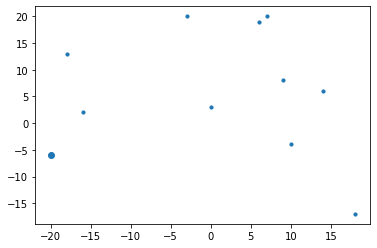

In [2]:
depart=(randint(-dim,dim),randint(-dim, dim))
import matplotlib.pyplot as plt
pts=points(nbpoints,dim)
print(pts)
x=[u[0] for u in pts] #On récupère les abscisses de pts
y=[u[1] for u in pts] #On récupère les ordonnées de pts
print(x,y)

plt.plot(depart[0],depart[1],"o")
#plt.plot(x,y,"x")
plt.scatter(x,y,10)
plt.show()

3. Les fonctions distance(p1,p2) et distances (pts,dep)

In [3]:
#Fonction qui calcule la distance entre 2 points
from math import sqrt
def distance(p1,p2):
    x1,y1=p1 #On récupère les coordonnées de P1 ou [x1,y1]=p1 fonctionne aussi
    x2,y2=p2 #On récupère les coordonnées de P2
    return sqrt((x1-x2)**2+(y1-y2)**2)

#On créé un tableau qui contient les distances entre les différents points
#considérés et entre chacun de ses points et le point de départ P
def distances(pts,dep):
    n=len(pts)
    tab=[(n+1)*[0] for i in range(n+1)] #On crée un tableau de (n+1) zéros (n+1) fois
    for i in range(n):
        for j in range(i):
            tab[i][j]=distance(pts[i],pts[j]) #On fait calculer la distance entre les différents points
            tab[j][i]=tab[i][j] #Symétrie du problème utilisé ici
        tab[n][i]=distance(dep,pts[i]) #On calcule par rapport au point de départ
        tab[i][n]=tab[n][i] #Symétrie du problème utilisé ici
    return tab

###### La fonction longueur non demandée dans le TD #####
#Cherchons une fonction qui calcule la distance totale parcourue
#En entrée on aura le chemin choisi et un tableau des distances
def longueur(chemin, dist):
  d=0
  id_pt=len(dist)-1
  for point in chemin:
    d=d+dist[id_pt][point]
    id_pt=point
  return d

  4. La stratégie gloutonne

In [4]:
#On crée une fonction indice qui applique la stratégie gloutonne en allant au
#point le plus proche du précédent.
def indice(position, dist, dispo):
  n=len(dist)-1
  mini=2*sqrt(2)*dim #distance maximale entre 2 points dans le carré de -dim à dim
  for i in range(n): #On va tester tous les points parmi les restants
    if dispo[i]==True: #Si true, c'est ok, si false c'est déjà pris
      d=dist[position][i]
      if d<mini:
        mini=d
        ind=i
  return ind

#Fonction qui construit le chemin à partir du tableau des distances à l'aide de "indice"
def glouton(dist):
  n=len(dist)-1
  chemin=[]
  dispo=n*[True] #Rien n'est utilisé comme point au départ
  position=n #On part du point de départ :)
  while len(chemin)<n:
    position=indice(position,dist,dispo) #Position représente l'indice à prendre à la stratégie gloutonne.
    chemin.append(position) #On remplit la liste
    dispo[position]=False #Pour que indice fonctionne.
  return chemin
# On a ainsi l'ordre des points à parcourir

  5. Tracé du chemin glouton

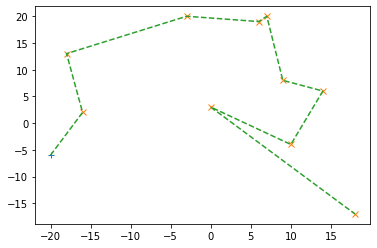

In [5]:
tableau=distances(pts,depart) #On crée le tableau en mettant départ en position 'n'
ch=glouton(tableau)
plt.plot(depart[0],depart[1],"+") #On affiche le pt de départ
plt.plot(x,y,"x") #On affiche les différents points
## print(longueur(ch,tableau))
xliste=[depart[0]]+[pts[k][0] for k in ch] #Concatenation des deux listes pour créer dans l'ordre les abcisses des pts
yliste=[depart[1]]+[pts[k][1] for k in ch] #Concatenation des deux listes pour créer dans l'ordre les ordonnées des pts

#affichage des chemins gloutons
plt.plot(xliste,yliste,"--")
plt.show()



---

Exercice 2 : Le rendu de monnaie

-- La version du cours pour rappel --

In [7]:
euros=[1,2,5,10,20,50,100,200]

#A mettre dans l'ordre croissant, au pire euros.sort()
def monnaie(p,r):
  #Quel n_uplet x faut-il pour obtenir la somme r
    n=len(p)
    i=n-1
    x=n*[0]
    while r>0:
        if r>=p[i]:
            x[i]=x[i]+1
            r=r-p[i]
        else:
            i=i-1
    return x

monnaie(euros,19)

[0, 2, 1, 1, 0, 0, 0, 0]

La version utilisant un dictionnaire


In [11]:
def monnaie(p,r):
    n=len(p)
    i=n-1
    solution={}
    while r>0:
        while r<p[i]:
            i=i-1
        cle=p[i] #Première valeur à prendre parmi la liste
        if cle in solution: #Au cas où l'on a déjà compté l'élément on le rajoute à la valeur précédente
            solution[cle]=solution[cle]+1 #val est la clef, solution est le dictionnaire affecté du résultat/clef.
        else:
            solution[cle]=1 #Sinon on démarre le décompte
        r=r-p[i]
    return solution

euros=(1,2,5,10,20,50,100,200)
monnaie(euros,19)

{10: 1, 5: 1, 2: 2}

Exercice 3 : Activités scolaires


1.   On peut sélectionner trois activités par exemple sur les créneaux de 9h-11h // 11h-12h // 12h-17h
2.   Cette stratégie sélectionne d'abord 9h-11h puis 11h-12h puis 14h-16h.
3. Dans la fonction prochaine, on utilise une variable k pour le numéro de la meilleure activité trouvée jusque là.



In [ ]:
def prochaine(debut,fin,h):
  hf=None
  k=None
  for i in range(len(debut)):
    if debut[i]>=h and (hf==None or fin[i]<hf):
      k=i
      hf=fin[i]
  return k

def selection(debut,fin):
  hd=0
  while True:
    i=prochaine(debut,fin,hd)
    if i==None: break
    print(i)
    hd=fin[i]

debut=[9,11,13,15,17]
fin=[12,15,17,18,19]

selection(debut,fin)

0
2
4
